# Trabajo Parcial - Física
Disclaimer, tengo miedo que se vaya la conexion aquí

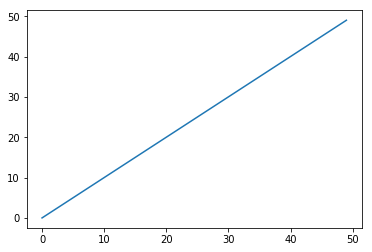

In [1]:
import matplotlib.pyplot as plt

x=range(50)

y=range(50)

plt.plot(x, y)

plt.show()

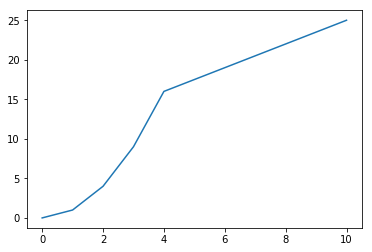

In [5]:
import matplotlib.pyplot as plt

y=[0, 1, 4 , 9, 16, 25]

x=[0, 1, 2, 3, 4, 10]

plt.plot(x, y)

plt.show()

In [2]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

for x in my_range(1, 10, 0.5):
    print (x)

1
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0


# 1. Movimiento de un paracaidista

## a. Parámetros

|               Parámetros                           |       Valores      |
|:----------------------------------------------------|:------------------:|
| Coeficiente de resistencia (C<sub>D</sub>)         |     1,17           |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 
| Masa del paracaidista (kg)                         |     80, 0          | 
| Área transversal del paracaidista (m<sup>2</sup>)  |    [6,00; 10,0]    | 
| Rapidez inicial (m/s)                              |    [0,00; 5,00]    | 
| Tiempo en que abre el paracaídas (s)               |    [15,0; 23,0]    |
| Altura inicial (m)                                 |    [3 000; 3 500]   |

In [1]:
import random

resistencia = 1.17
densidad_aire = 1.20
masa = 80.00
area = float(format(random.uniform(6, 10), '.2f'))
rapidez_i = float(format(random.uniform(0, 5), '.2f'))
tiempo_abre_paracaidas = float(format(random.uniform(15, 23), '.2f'))
altura_i = float(format(random.uniform(3000,3500), '.2f'))

gravedad = -9.81

In [2]:
print("Resistencia: {0:.2f}".format(resistencia))
print("Densidad del aire: {0:.2f}".format(densidad_aire))
print("Masa del paracaidista: {0:.2f}".format(masa))
print("Area transversal paracaidista: ", area)
print("Rapidez inicial: ",rapidez_i)
print("Tiempo en que se abre el paracaidas: ", tiempo_abre_paracaidas)
print("Altura inicial: ", altura_i)

Resistencia: 1.17
Densidad del aire: 1.20
Masa del paracaidista: 80.00
Area transversal paracaidista:  8.73
Rapidez inicial:  2.69
Tiempo en que se abre el paracaidas:  18.49
Altura inicial:  3089.67


## b. Generación de datos (posición, velocidad y aceleración)

Sea:
$$
tap = tiempo\hspace{1mm}abre\hspace{1mm}paracaidas\\
\\
tde = tiempo\hspace{1mm}de\hspace{1mm}equilibrio
$$
### Posición

$$x_{(t)} =     \left \{ \begin{array}{rcl}
x_0 + v_0t + \frac{1}{2}at^2 & \mbox{,} & 0\leq t < tap \\ 
x_{(tap)}+ v_{(tap)}t + \frac{1}{2}a_{(t)}(t-tap)^2 & \mbox{,} & tap \leq t < tde \\
x_{(tde)} + v(t-tde) & \mbox{,} & tde \leq t < tiempo\hspace{1mm}final
\end{array}\right.$$

### Velocidad

$$v_{(t)} =     \left \{ \begin{array}{rcl}
v_0 + at & \mbox{,} & 0\leq t < tap \\ 
v_{(tap)} + a_{(t)}(t-tap) & \mbox{,} & tap \leq t < tde \\
\sqrt{\frac{m \mid g \mid}{k}} & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

### Aceleración

$$a_{(t)} =     \left \{ \begin{array}{rcl}
g & \mbox{,} & 0\leq t < tap \\ 
{\displaystyle \frac{mg + kv_{(t)}^2}{m}}  & \mbox{,} & tap \leq t < tde \\
0 & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

In [7]:
k = (resistencia * densidad_aire * area) / 2

print(k)

import math

posicion = []
velocidad = []
aceleracion = []
tiempo = []

# Primera etapa ( 0 <= t < tap)

tap = tiempo_abre_paracaidas

a = -gravedad

t = 0
dt = 1
v = rapidez_i
a = gravedad
x = altura_i

while(t < tap):    
    v = rapidez_i + a * t
    x = altura_i + (rapidez_i + v) * tap / 2
    tiempo.append(t)    
    velocidad.append(v)
    aceleracion.append(a)
    posicion.append(x)
    t = t + dt

print("Tiempo: {:.3f}, Velocidad: {:.3f}, Aceleracion: {:.3f}, Posicion: {:.3f}".format(tiempo[-1], v, a, x))

# Segunda etapa

t = 0 ## Tiempo
dt = 0.001 ## Diferencial de tiempo
v = rapidez_i + gravedad * tap ## Velocidad
a = (masa * gravedad + k * pow(v, 2)) / masa ## Aceleracion
x = altura_i + (rapidez_i + v) * tap / 2 ## Posicion

print("Tiempo inicial: {:.2f}, Velocidad inicial: {:.2f}, Aceleracion inicial: {:.2f}, Posicion inicial {:.2f}".format(t, v, a, x))
tiempo.append(t + tap)
velocidad.append(v)
aceleracion.append(a)
posicion.append(x)


while ( a > 0):
    v_0 = v
    t = t + dt      
    v = v + a * t
    a = (masa * gravedad + k * pow(v, 2)) / masa
    x = x + ((v_0 + v) * dt / 2)
    tiempo.append(t + tap)
    velocidad.append(v)
    aceleracion.append(a)
    posicion.append(x)
    print("Tiempo: {:.3f}, Velocidad: {:.3f}, Aceleracion: {:.3f}, Posicion: {:.3f}".format(t, v, a, x))
    
tde = tap + t
x_tde = x
t = tde
dt = 1
a = 0
print("Velocidad: {:.2f} metros por segundo, Tiempo: {:.2f} segundos".format(math.sqrt(masa*gravedad*-1/k),tde))

#aceleracion = (k*velocidad - masa_paracaidista*gravedad)/masa_paracaidista

# Tercera etapa

while (x > 0):    
    x = x_tde + (t - tde) * v
    tiempo.append(t + tap)
    velocidad.append(v)
    aceleracion.append(a)
    posicion.append(x)
    t = t + dt
    print("Tiempo: {:.3f}, Velocidad: {:.3f}, Aceleracion: {:.3f}, Posicion: {:.3f}".format(t, v, a, x))
    
    
    

6.12846
Tiempo: 18.000, Velocidad: -173.890, Aceleracion: -9.810, Posicion: 1506.926
Tiempo inicial: 0.00, Velocidad inicial: -178.70, Aceleracion inicial: 2436.41, Posicion inicial 1462.49
Tiempo: 0.001, Velocidad: -176.260, Aceleracion: 2370.159, Posicion: 1462.309
Tiempo: 0.002, Velocidad: -171.520, Aceleracion: 2243.868, Posicion: 1462.135
Tiempo: 0.003, Velocidad: -164.789, Aceleracion: 2070.440, Posicion: 1461.967
Tiempo: 0.004, Velocidad: -156.507, Aceleracion: 1866.600, Posicion: 1461.806
Tiempo: 0.005, Velocidad: -147.174, Aceleracion: 1649.480, Posicion: 1461.654
Tiempo: 0.006, Velocidad: -137.277, Aceleracion: 1433.822, Posicion: 1461.512
Tiempo: 0.007, Velocidad: -127.240, Aceleracion: 1230.442, Posicion: 1461.380
Tiempo: 0.008, Velocidad: -117.397, Aceleracion: 1045.968, Posicion: 1461.257
Tiempo: 0.009, Velocidad: -107.983, Aceleracion: 883.437, Posicion: 1461.145
Tiempo: 0.010, Velocidad: -99.149, Aceleracion: 743.258, Posicion: 1461.041
Tiempo: 0.011, Velocidad: -90.973

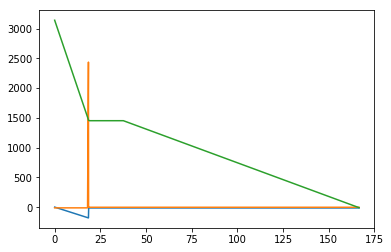

In [8]:
plt.plot(tiempo, velocidad)
plt.plot(tiempo, aceleracion)
plt.plot(tiempo, posicion)
plt.show()

In [44]:
for t in my_range(0, 51):
    print(t, ": ",calcularVelocidad(t))

0 :  1.794236544796579
1 :  -8.015763455203421
2 :  -17.825763455203422
3 :  -27.63576345520342
4 :  -37.445763455203426
5 :  -47.25576345520343
6 :  -57.065763455203424
7 :  -66.87576345520343
8 :  -76.68576345520343
9 :  -86.49576345520343
10 :  -96.30576345520343
11 :  -106.11576345520344
12 :  -115.92576345520342
13 :  -125.73576345520343
14 :  -135.54576345520343
15 :  -145.35576345520343
16 :  -155.16576345520343
17 :  -164.97576345520343
18 :  -11.129829260251485
19 :  -11.129829260251485
20 :  -11.129829260251485
21 :  -11.129829260251485
22 :  -11.129829260251485
23 :  -11.129829260251485
24 :  -11.129829260251485
25 :  -11.129829260251485
26 :  -11.129829260251485
27 :  -11.129829260251485
28 :  -11.129829260251485
29 :  -11.129829260251485
30 :  -11.129829260251485
31 :  -11.129829260251485
32 :  -11.129829260251485
33 :  -11.129829260251485
34 :  -11.129829260251485
35 :  -11.129829260251485
36 :  -11.129829260251485
37 :  -11.129829260251485
38 :  -11.129829260251485
39 : 

In [51]:
for t in range(0, 51):
    print(t, ": ",calcularPosicion(t))

0 :  3444.5959322776434
1 :  3447.706695732847
2 :  3460.62745918805
3 :  3483.3582226432536
4 :  3515.898986098457
5 :  3558.2497495536604
6 :  3610.4105130088637
7 :  3672.381276464067
8 :  3744.1620399192707
9 :  3825.7528033744743
10 :  3917.153566829678
11 :  4018.3643302848814
12 :  4129.385093740085
13 :  4250.215857195288
14 :  4380.856620650491
15 :  4521.307384105695
16 :  4671.568147560898
17 :  4831.638911016102
18 :  1823.914691141708
19 :  1642.429691141708
20 :  1451.1346911417081
21 :  1250.029691141708
22 :  1039.1146911417081
23 :  818.3896911417078
24 :  587.8546911417079
25 :  347.5096911417081
26 :  97.35469114170792
27 :  -162.61030885829223
28 :  -432.38530885829186
29 :  -711.9703088582924
30 :  -1001.3653088582919
31 :  -1300.5703088582918
32 :  -1609.5853088582921
33 :  -1928.410308858292
34 :  -2257.045308858292
35 :  -2595.490308858292
36 :  -2943.745308858292
37 :  -3301.8103088582925
38 :  -3669.6853088582925
39 :  -4047.370308858292
40 :  -4434.8653088582

## c. Gráficos

1. Posición vs tiempo
2. Velocidad vs tiempo
3. Aceleración vs tiempo
4. Fuerza de arrastre vs tiempo

2. Velocidad vs tiempo


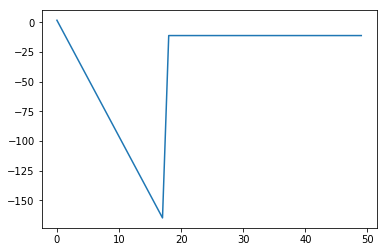

In [45]:
x = range(50)

y = [calcularVelocidad(i) for i in range(50)]

print("2. Velocidad vs tiempo")

plt.plot(x, y)

plt.show()

In [25]:
from IPython.display import Latex
Latex(r"""\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{align}""")

<IPython.core.display.Latex object>